<h1>Programmatically accessing, processing, and visualizing 3DEP data using USGS 7.5' Quadrangles<h1>

<h2>Table of Contents<span class="tocSkip"></span></h2>
<div class="toc"><ul class="toc-item"><li><span><a href="#Authors" data-toc-modified-id="Authors-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Authors</a></span></li><li><span><a href="#Purpose" data-toc-modified-id="Purpose-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Purpose</a></span></li><li><span><a href="#Funding" data-toc-modified-id="Funding-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Funding</a></span></li><li><span><a href="#Keywords" data-toc-modified-id="Keywords-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Keywords</a></span></li><li><span><a href="#Citation" data-toc-modified-id="Citation-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Citation</a></span></li><li><span><a href="#Setup" data-toc-modified-id="Setup-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Setup</a></span><ul class="toc-item"><li><span><a href="#Library-Imports" data-toc-modified-id="Library-Imports-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Library Imports</a></span></li><li><span><a href= "Define-Functions" data-toc-modified-id="Define-Functions-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Define Functions</a></span></ul><li><span><a href="#Data-Access-and-Visualization" data-toc-modified-id="Data-Access-and-Visualization-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Data Access and Visualization</a></span><ul class="toc-item"><li><span><a href="#Access-3DEP-Data" data-toc-modified-id="Access-3DEP-Data-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Access 3DEP Data</a></span></li><li><span><a href="#Create-Interactive-Ipyleaflet-Map-And-Define-AOI" data-toc-modified-id="Create-Interactive-Ipyleaflet-Map-And-Define-AOI-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Create Interactive Ipyleaflet Map and Define AOI</a></span></li><li><span><a href="Find-Intersecting-3DEP-Polygons" data-toc-modified-id="Find-Interseciting-3DEP-Polygons-7.3"><span class="toc-item-num">7.3&nbsp;&nbsp;</span>Find Intersecting 3DEP Polygons</a></span></li></ul></li><li><span><a href="#Data-Processing" data-toc-modified-id="Data-Processing-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Data Processing</a></span><ul class="toc-item"></ul></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Conclusion</a></span></li><li><span><a href="#Resources" data-toc-modified-id="Resources-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Resources</a></span></li></ul></div>

<h2>Authors</h2>
<a id='#Authors'></a>

-  Author1 = {"name": "Cole Speed", "affiliation": "UNAVCO, Inc.", "email": "cole.speed@beg.utexas.edu", "orcid": "https://orcid.org/0000-0003-0166-3642"}
-  Author2 = {"name": "Matthew Beckley", "affiliation": "UNAVCO, Inc.", "email": "beckley@unavco.org", "orcid":""}
-  Author3 = {"name": "Christopher Crosby", "affiliation": "UNAVCO, Inc.", "email": "crosby@unavco.org", "orcid": "https://orcid.org/0000-0003-2522-4193"}
-  Author4 = {"name": "Viswanath Nandigam", "affiliation": "San Diego Supercomputer Center, UC San Diego", "email": "viswanat@sdsc.edu", "orcid": "https://orcid.org/0000-0003-0928-9851"}
    
<h2>Purpose</h2>
<a id='#Purpose'></a>

The United States Geological Survey's 3-D Elevation Program (3DEP) is collecting high-quality topographic -- light detection and ranging (lidar) -- data for the entire conterminous United States, Hawaii, the U.S territories, and Interferometric Synthetic Aperture Radar (IfSAR) for Alaska over an 8-year period. Data acquisition is ongoing, with over 1800 3DEP datasets consisting of >42 trillion points covering an area of > 6 million $km^{2}$ already available for use. Data are hosted and publically available in Entwine Point Tile (EPT) format as an <a href="https://registry.opendata.aws/usgs-lidar/"> Amazon Web Services Public dataset</a>.

3DEP point cloud data can be accessed on the web from a variety of resources including the <a href="https://portal.opentopography.org/datasets">OpenTopography Portal</a> and the <a href="https://prd-tnm.s3.amazonaws.com/LidarExplorer/index.html#/process">USGS Lidar Explorer</a>. Due to size of the 3DEP dataset and limited computational resources, these web services currently implement limits on the spatial extent over which point cloud data may be accessed for a single job. In some cases, however, users may prefer to access, process and visualize 3DEP data over large extents programmatically for a specific area of interest on their local workstation without the web service limitations. 

This Jupyter Notebook is part of a suite developed, as part of a Community for Data Integration (CDI) initiative, in an effort to leverage available APIs and cloud resources to enhance access and usability of 3DEP data and products. Specifically, this notebook provides the basic functionally and pipelines for effectively and efficiently accessing, processing, and visualizing 3DEP data and making digital elevation models (DEMs) for a user-specified USGS 7.5'x7.5' quadrangle. This and the other use-case specific Jupyter Notebooks developed as part of this effort for programmatic 3DEP access are available in a <a href="https://github.com/cmspeed/OT_3DEP_Workflows"> Github repository </a>.

A 7.5 minute quadrangle map covers an area of 49 to 70 square miles (130 to 180 km2). ###Worth thinking about how many points will be within each quad in this case.

<h4>Specific features of this notebook</h4>
    
- User selects a point location on an interactive map and the corresponding USGS 7.5'x7.5' quadrangle is requested via the <a href= "https://carto.nationalmap.gov/arcgis/rest/services/map_indices/MapServer/10/Service"> USGS 7.5 Minute (1:24K) Index Web Service </a>.

- The corresponding 3DEP point cloud dataset is accessed programmatically from the <a href="https://registry.opendata.aws/usgs-lidar/"> Amazon Web Services (AWS) public EPT (Entwine Point Tile) bucket</a>, implementing the user-defined AOI and made available for subsequent processing.

- Flexibile and customizable PDAL pipelines are available for reclassifying, filtering, and computing derivate products based on user-defined specifications.
 
- DEM (DTM/DSM) generation for the specified 7.5' quadrangle with option to save (or not) point cloud data.

- Point cloud data and/or derivative products are saved to local directory or local path defined by user.

<h4>Additional resources</h4>
Five additional Python-based workflow have been developed and are availble in Jupyter Notebook format for: <br>
  
1. <a href="https://github.com/cmspeed/OT_3DEP_Workflows/blob/main/notebooks/3DEP_pointcloud_access_processing_DTM_creation.ipynb"> Programmatically accessing, processing, and visualizing USGS 3D Elevation Program (3DEP) lidar point cloud data for user-defined area of interest </a>.

2. <a href = ""> Programmatically accessing, processing and visualizing 3DEP data using the USGS 12-digit Hydrologic Unit Codes (HUCs) </a>.

3. <a href="https://github.com/cmspeed/OT_3DEP_Workflows/blob/main/notebooks/Canopy_Height_Model_From_3DEP_Data.ipynb"> Programmatially accessing 3DEP point cloud data and creating canopy height models (CHMs) </a>.
   
4. <a href=""> Programmatically accessing 3DEP co-located point cloud data and producing topographic difference products</a>.

5. <a href = ""> Programmatically accessing 3DEP data and producing colorized point clouds using NAIP 1m Imagery </a>.


<h2>Funding</h2>
<a id='#Funding'></a>

Funding for the creation and distribution of these Jupyter Notebook-based workflows was provided as by the Community for Data Integration through the funded award *"Enhancing usability of 3DEP data and web services with Jupyter notebooks"*, jointly awarded to OpenTopography and the US Geological Survey. OpenTopography is supported by the National Science Foundation under Award Numbers 1948997, 1948994 & 1948857

<h2>Keywords</h2>
<a id='#Keywords'></a>

keywords=["OpenTopography","USGS", "CDI", "3DEP", "PDAL"]

<h2>Citation</h2>
<a id='#Citation'></a>

To cite this notebook:  Speed, C., Beckley, M., Crosby, C., & Nandigam, V. (2022). Programmatically accessing, processing, and visualizing USGS 3D Elevation Program (3DEP) lidar point cloud data for user-defined area of interest (Version v1.0). DOI: Accessed: MM/DD/YYYY

## 6. Setup

This notebook provides a self-contained workflow for accessing, processing, and visualizing 3DEP point cloud data and generating digital elevation models (DEMs). The notebook is designed to be executed in its unmodified form, but can also be customized to fit the specific use-case. There are two options for performing this workflow outlined below. Option 1 is our suggested method for simplicity, as building the virtual environement with the required dependencies on the user's local filesystem can be tricky based on the user's experience level with Python and Anaconda.

1. **Option 1**: Launch the interactive Jupyter notebook on Google Colaboratory.
    - Follow the steps outlined in 6.1 Install and run on Google Colaboratory (Hyperlink this to 6.1).
    - Does not require creation of a virtual environment or installation on local filesystem.
    - Requires Google account and access to personal Google Drive folder.
    - Data download limits will be dependent on user's available Google Drive storage. 
    - If you wish to run this notebook in Google Colaboratory click the 'Open in Colab' badge below. 
    <br/><br/>
2. **Option 2**: Download this Jupyter notebook (.ipynb file) to your local file system.
    - Follow the steps outlined in 6.2. Install and run on local filesytem. (hyper link this to the cell 6.2)
    - Create a virtual environement containing the required dependencies (see below).
    - Run Juypter notebook on local machine.
    - Data download limits will be dependent on user's available hard drive storage.

### 6.1.1. Option 1 - Install and run on Google Colaboratory
If the user would like to launch the notebook and execute the processes in Google Colaboratory, click the badge "Open in Colab" below. This will launch a new browser tab. Continue running the remaining notebook cells in this new tab.

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/cmspeed/OT_3DEP_Workflows/blob/main/notebooks/Programmatically_accessing_3DEP_data_using_USGS_7.5_Quadrangles.ipynb)

In [ ]:
### Exectute this block of cells if running on Google Colab
!git clone https://github.com/cmspeed/OT_3DEP_Workflows

In [ ]:
# Installs Conda, which is the easiest way to install PDAL in the Google Colab environment
# This will trigger a notification that the "Your session crashed for an unknown reason." 
# This is normal. Execute next cell.
!pip install -q condacolab
import condacolab
condacolab.install()

In [ ]:
# Import Conda and install PDAL ---- Takes 1-2 minutes
import condacolab
condacolab.check()
!mamba install -q python-pdal

In [ ]:
#  Install the remaining dependencies
!pip install -r OT_3DEP_Workflows/requirements.txt

In [ ]:
# Mount your Google Drive for saving content
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
### Runtime must be restarted after the above executes before import of PDAL will be successful!
### On Google Colab ribbon click "Runtime" > "Restart Runtime".  
### Do not execute any of the previous cells. Execute the following cells only.

**If using Option 1 (Google Colab), proceed to 6.2 Library Imports**

### 6.1.2. Option 2 - Install and run on Local Filesystem

If you would like to run the Jupyter Notebook on your local machine, execute the following commands in your terminal or commandline (does not vary between MacOS, Linux, or Windows:

`mkdir 3DEP` - Make a new directory where the 3DEP Jupyter Notebooks (and all 3DEP data, if desired) will be saved.

`cd 3DEP` - Change the current directory to the new 3DEP directory.

`git clone https://github.com/cmspeed/OT_3DEP_Workflows` - Creates an exact copy (or clone) of the Github repository on your local filesystem. 

It is suggested to use Anaconda. Anaconda installers for MacOS/Linux/Windows can be downloaded from https://docs.anaconda.com/anaconda/install/. Follow the instructions to install the appropriate version of Anaconda.

Back in your terminal/commandline execute the following commands:

`conda env create -n 3dep --file environment.yml` (3dep will be the name of the conda environement. If you would like it to be called something else, replace '3dep' with the desired name in the above command.)

`conda activate 3dep` - Activates the 3dep virtual environment which will have all of the necessecary dependencies installed. 
Still probably need to clone the repo. 

Add detail here about setting up conda environement

<h3> 6.2 Library Imports</h3>
<a id='#Library-Imports-6.1'></a>

After successfully creating a virtual environement using Option 1 or Option 2 above, proceed to import the necessary Python modules below.

In [2]:
#Import Modules
import os
import copy
import json
import pdal
from osgeo import gdal
import numpy as np
import geopandas as gpd
import math
import matplotlib
import matplotlib.pyplot as plt
import ipyleaflet
import ipywidgets as widgets
from shapely.geometry import shape, Point, Polygon
from shapely.ops import transform
import requests
import pyproj
from pyproj.aoi import AreaOfInterest
from pyproj.database import query_utm_crs_info

<h3>6.3 Define Functions</h3>
<a id='#Define-Functions-6.2'></a>

Several functions are provided in the cell below. These functions are necessary for successful execution of remainder of the notebook. Broadly, these functions provide the utility for the user to draw and area of interest (AOI) on an interactive map and construct the PDAL pipeline for getting the point cloud data from the Amazon Web Services EPT bucket, performing processing steps, producing DEMs, and saving the results. A short explanation of each function is provided here for clarity, and a description of the parameters are provided as docstrings in the function definitions.

```gcs_to_proj()```: Projects a Shapely polygon (the user-defined AOI) from geographic coordinates, WGS84 (EPSG: 4326) -  the output of drawing the AOI on the interactive map - to Web Mercator projection (EPSG: 3857) - the projection of the 3DEP data.

```handle_draw()```: Provides interactive drawing capability on ipyleaflet maps and storing the object for use as the input boundary in requesting 3DEP point cloud data.

```build_pdal_pipeline()```: Used to construct the pdal pipeline to request/process/ the point cloud data from AWS EPT public bucket.

```make_DEM_pipeline```: Used to construct the PDAL pipeline to perform steps in ```build_pdal_pipeline()``` and create a DEM (DSM or DTM) from the point cloud data.

**These functions can be modified as the user sees fit; however, they are designed to work with a simple execution of the below cell.**

In [3]:
def gcs_to_proj(poly):
    """
    Function for reprojecting polygon shapely object from geographic coordinates (EPSG:4326) 
    to Web Mercator (EPSG: 3857)). 
    
    :param poly: shapely polygon for user area of interest (AOI)
    """
    wgs84 = pyproj.CRS("EPSG:4326")
    web_mercator = pyproj.CRS("EPSG:3857")
    project = pyproj.Transformer.from_crs(wgs84, web_mercator, always_xy=True).transform
    user_poly_proj3857 = transform(project, poly)
    return(user_poly_proj3857)
    
def handle_draw(target, action, geo_json):
    """
    Allow user to draw area of interest (AOI) on interactive ipyleaflet map.
    
    :param extent_epsg3857: polygon for user-defined AOI
    :param usgs_3dep_dataset_name: name of 3DEP dataset which AOI overlaps
    :param resolution: The desired resolution of the pointcloud based on the following definition:
    """
        
    geom = dict(geo_json['geometry'])
    user_poly = shape(geom)
    user_poly_proj3857 = gcs_to_proj(user_poly)
    print('AOI is valid and has boundaries of ', user_poly_proj3857.bounds)
    user_AOI.append((user_poly, user_poly_proj3857))  #for various reasons, we need user AOI in GCS and EPSG 3857

def build_pdal_pipeline(extent_epsg3857, usgs_3dep_dataset_names, pc_resolution, filterNoise = False,
                        reclassify = True, savePointCloud = True, pc_outName = 'filter_test', pc_outType = 'laz'):

    """
    Build pdal pipeline for requesting, processing, and saving point cloud data.
    
    Parameters:
    :param extent_epsg3857: Polygon for user-defined AOI in Web Mercator projection (EPS:3857)
                            usgs_3dep_dataset_name: name of 3DEP dataset which AOI overlaps. Polygon is generated 
                            either through the 'handle_draw' methor or by inputing their own coordinates.
                            This parameter is set automatically when the user-defined AOI is chosen.
    :param usgs_3dep_dataset_names: List of name of the 3DEP dataset(s) that the data will be obtained. This parameter is set 
                                automatically when the user-defined AOI is chosen.
    :param pc_resolution: The desired resolution of the pointcloud based on the following definition:
        
                        Source: https://pdal.io/stages/readers.ept.html#readers-ept
                            A point resolution limit to select, expressed as a grid cell edge length. 
                            Units correspond to resource coordinate system units. For example, 
                            for a coordinate system expressed in meters, a resolution value of 0.1 
                            will select points up to a ground resolution of 100 points per square meter.
                            The resulting resolution may not be exactly this value: the minimum possible 
                            resolution that is at least as precise as the requested resolution will be selected. 
                            Therefore the result may be a bit more precise than requested.
                            
    :param filterNoise: Option to remove points from USGS Class 7 (noise).
    :param savePointCloud: Option to save (or not) the point cloud dataset.
    :param pc_outName: Desired name of file on user's local filesystem. If savePointcloud = False, 
                       this should be outName = ''
    :param pc_outType:  Desired file extension. Input must be either 'las' or 'laz'. If a different file type is
    :param requested,the user will get error stating "Extension must be 'las' or 'laz'". If savePointcloud = False, 
        this should be outType = ''
    :raise Exception: If user passes in argument that is not 'dtm' or 'dsm'
    """
    urls = []
    for name in usgs_3dep_dataset_names:
        urls.append("https://s3-us-west-2.amazonaws.com/usgs-lidar-public/{}/ept.json".format(name))
    
    ### TODO: Add an option to choose an output CRS
    ### TODO: Add option to output shapefile of the bounding box. 
    ### TODO: Consider restructuring pipeline construction with list comprehension
              #pipline = [dict(zip([1],[stage])) for x in range(1,len(stages))], or similar.
    ### Important note: smrf cannot be run in streaming mode
    ### TODO: Test performance in and out of streaming mode. Could create a execute_pipeline() 
        ###   that tests whether streaming is possible.
        
    #this is the basic pipeline which only accesses the 3DEP data. There is an optional
    readers = []
    for url in urls:
        reader = {
                    "type": "readers.ept",
                    "filename": str(url),
                    "polygon": str(extent_epsg3857),
                    "requests": 3,
                    "resolution": pc_resolution
                }
        readers.append(reader)
        
    pointcloud_pipeline = {
            "pipeline":
                readers
    }
    
    if filterNoise == True:
        
        filter_stage = {
            "type":"filters.range",
            "limits":"Classification![7:7], Classification![18:18]"
        }
        
        pointcloud_pipeline['pipeline'].append(filter_stage)
    
    if reclassify == True:
        
        remove_classes_stage = {
            "type":"filters.assign",
            "value":"Classification = 0"
        }
        
        classify_ground_stage = {
            "type":"filters.smrf"
        }
        
        reclass_stage = {
            "type":"filters.range",
            "limits":"Classification[2:2]"
        }
        
        pointcloud_pipeline['pipeline'].append(remove_classes_stage)
        pointcloud_pipeline['pipeline'].append(classify_ground_stage)
        pointcloud_pipeline['pipeline'].append(reclass_stage)
        
    if savePointCloud == True:
        
        if pc_outType == 'las':
            savePC_stage = {
                "type": "writers.las",
                "filename": str(pc_outName)+'.'+ str(pc_outType)
            }
        elif pc_outType == 'laz':    
            savePC_stage = {
                "type": "writers.las",
                "compression": "laszip",
                "filename": str(pc_outName)+'.'+ str(pc_outType)
            }
        else:
            raise Exception("pc_outType must be 'las' or 'laz'.")

        pointcloud_pipeline['pipeline'].append(savePC_stage)
        
    return pointcloud_pipeline


def make_DEM_pipeline(extent_epsg3857, usgs_3dep_dataset_name, pc_resolution, dem_resolution,
                      filterNoise = True, reclassify = True, savePointCloud = False, pc_outName = 'filter_test', 
                      pc_outType = 'laz', demType = 'dtm', gridMethod = 'idw', dem_outName = 'dem_test', 
                      dem_outExt = 'tif', driver = "GTiff"):
    
    """
    Build pdal pipeline for creating a digital elevation model (DEM) product from the requested point cloud data. The 
    user must specify whether a digital terrain (bare earth) model (DTM) or digital surface model (DSM) will be created, 
    the output DTM/DSM resolution, and the gridding method desired. 

    The `build_pdal_pipeline() method is used to request the data from the Amazon Web Services ept bucket, and the 
    user may define any processing steps (filtering or reclassifying). The user must also specify whether the point 
    cloud should be saved or not. Saving the point cloud is not necessary for the generation of the DEM. 

    
    :param extent_epsg3857: Polygon for user-defined AOI in Web Mercator projection (EPS:3857)
                         usgs_3dep_dataset_name: name of 3DEP dataset which AOI overlaps. Polygon is generated 
                         either through the 'handle_draw' methor or by inputing their own coordinates.
                         This parameter is set automatically when the user-defined AOI is chosen.
    :param usgs_3dep_dataset_name: Name of the 3DEP dataset that the data will be obtained. This parameter is set 
                                automatically when the user-defined AOI is chosen.
    :param pc_resolution: The desired resolution of the pointcloud based on the following definition:

                        Source: https://pdal.io/stages/readers.ept.html#readers-ept
                            A point resolution limit to select, expressed as a grid cell edge length. 
                            Units correspond to resource coordinate system units. For example, 
                            for a coordinate system expressed in meters, a resolution value of 0.1 
                            will select points up to a ground resolution of 100 points per square meter.
                            The resulting resolution may not be exactly this value: the minimum possible 
                            resolution that is at least as precise as the requested resolution will be selected. 
                            Therefore the result may be a bit more precise than requested.

    :param dem_resolution: Desired grid size (in meteres) for output raster DEM 
    :param filterNoise: Option to remove points from USGS Class 7 (noise).
    :param savePointCloud: Option to save (or not) the point cloud dataset.
    :param pc_outName: Desired name of file on user's local filesystem. If savePointcloud = False, 
                  this should be outName = ''
    :param pc_outType:  Desired file extension. Input must be either 'las' or 'laz'. If a different file type is requested,
                  the user will get error stating "Extension must be 'las' or 'laz'". If savePointcloud = False, 
                  this should be outType = ''
    :param demType: Type of DEM produced. Input must 'dtm' (digital terrain model) or 'dsm' (digital surface model).
    :param gridMethod: Method used. Options are 'min', 'mean', 'max', 'idw'. ELABORATE MORE HERE.
    :param dem_outName: Desired name of DEM file on user's local filesystem.
    :param dem_outExt: DEM file extension. ELABORATE MORE HERE.
    :param driver: Driver used. ELABORATE MORE HERE.
    :raise Exception: If user passes in argument that is not 'dtm' or 'dsm'
    """

    dem_pipeline = build_pdal_pipeline(extent_epsg3857, usgs_3dep_dataset_name, pc_resolution,
                                              filterNoise, reclassify, savePointCloud, pc_outName, pc_outType)
    
    if demType == 'dsm':
        dem_stage = {
                "type":"writers.gdal",
                "filename":str(dem_outName)+ '.' + str(dem_outExt),
                "gdaldriver":driver,
                "nodata":-9999,
                "output_type":gridMethod,
                "resolution":float(dem_resolution),
                "gdalopts":"COMPRESS=LZW,TILED=YES,blockxsize=256,blockysize=256,COPY_SRC_OVERVIEWS=YES"
        }
    
    elif demType == 'dtm':
        groundfilter_stage = {
                "type":"filters.range",
                "limits":"Classification[2:2]"
        }

        dem_pipeline['pipeline'].append(groundfilter_stage)

        dem_stage = {
                "type":"writers.gdal",
                "filename":str(dem_outName)+ '.' + str(dem_outExt),
                "gdaldriver":driver,
                "nodata":-9999,
                "output_type":gridMethod,
                "resolution":float(dem_resolution),
                "gdalopts":"COMPRESS=LZW,TILED=YES,blockxsize=256,blockysize=256,COPY_SRC_OVERVIEWS=YES"
        }
    
    else:
        raise Exception("demType must be 'dsm' or 'dtm'.")
        
        
    dem_pipeline['pipeline'].append(dem_stage)
    
    return dem_pipeline

## 7. Define Location of USGS 7.5' Quad 3DEP Access
Now that we have the required modules imported and functions defined, we can proceed with defining the desired 7.5' quadrangle and accessing the 3DEP data from the Amazon Web Services EPT bucket. 

<h3> 7.1 Get 3DEP Data Polygons</h3>
<a id='#Access-3DEP-Data-7.1'></a>

First, we will get the 3DEP dataset polygon boundaries so we will know if 3DEP data is currently available for our AOI. An up-to-date version of the currently available 3DEP dataset boundaries are maintained by Hobu Inc. in the Github repository https://github.com/hobuinc/usgs-lidar/. 

In the following cell, we obtain and save a local copy of these boundaries in geojson format using an API request to the repository. We create a geopandas dataframe object to easily access the names, url, and point count of each dataset, and we use the ```gcs_to_proj()``` function to project each 3DEP polygon geometry to Web Mercator projection (EPSG: 3857).

In [4]:
# Get GeoJSON file for 3DEP outlines from URL 

#this needs to be modified to always make a new pull, even if it exists because it is possible updated at the source.
print("Requesting, loading, and projecting 3DEP dataset polygons...")

url = 'https://raw.githubusercontent.com/hobuinc/usgs-lidar/master/boundaries/resources.geojson'
r = requests.get(url)
with open('resources.geojson', 'w') as f:
    f.write(r.content.decode("utf-8"))

with open('resources.geojson', 'r') as f:
    data = json.load(f)

geo_json_3DEP = ipyleaflet.GeoJSON(data=data, style = {'color': 'green', 'opacity':1, 
                                       'weight':1.9, 'fillOpacity':0.1})

with open('resources.geojson', 'r') as f:
    df = gpd.read_file(f)

projected_geoms = []
for geometry in df['geometry']:
        projected_geoms.append(gcs_to_proj(geometry))

print('Done. 3DEP polygons downloaded and projected to Web Mercator (EPSG:3857)')
geometries_GCS = df['geometry']
geometries_EPSG3857 = gpd.GeoSeries(projected_geoms)
names = df['name']
urls = df['url']
num_points = df['count']

Loading 3DEP dataset polygons...
Done. 3DEP polygons downloaded and reprojected to Web Mercator (EPSG:3857)


<h3> 7.2 Create Interactive Ipyleaflet Map and Define AOI</h3>
<a id='#Create-Interactive-Ipyleaflet-Map-And-Define-AOI-7.2'></a>


Next, we will specify the location of the desired USGS 7.5' quadrangle using an ipyleaflet interactive map and the 3DEP dataset polygons loaded in the prior step.  There is currently one options for defining specifying the quad:

2. **Option 1** - User places a maker on an ipyleaflet interactive map to define location.

Running the next cell will produce an interactive map, make an ipyleaflet layer out of the 3DEP dataset polygon geojson, and allow the user to place a marker to define the location of the desired 7.5' quad. When the map is rendered, use the +/- symbols to zoom in and out. The currently available 3DEP datasets are shown in transparent green polygons. The current functionality of the notebook allows the user AOI to straddle multiple 3DEP datsets. In this case, points from both datasets will be queried and merged into the resulting las/laz file.

**Important Note 1: Use the 'marker' shaped button on the left sidebar to place a marker on the map. None of the other tools in the sidebar should be used in this notebook.**

**Important Note 2: If the user would like to place a new marker, the cell below must be re-executed each and every time. If multiple markers are drawn on the same interactive map without re-executing the cell, subsequent cells will not function appropriately. The cell must be run each and every time the user would like to define a new AOI.**

In [47]:
m = ipyleaflet.Map(
    basemap=ipyleaflet.basemaps.Esri.WorldTopoMap,
    center=(39, -100),
    zoom=3,
    crs=ipyleaflet.projections.EPSG3857
    )

m.add_layer(geo_json_3DEP)  #add 3DEP polygons GeoJSON

dc = ipyleaflet.DrawControl(
    marker={"shapeOptions": {"color": "blue"}},
    polyline={},
    polygon={},
    circlemarker={},
)

print('Place a marker on the map using the tools on the left sidebar where you would like the corresponding USGS quadrangle')
user_AOI = []
dc.on_draw(handle_draw)
m.add_control(dc)
display(m)

Place a marker on the map using the tools on the left sidebar where you would like the corresponding USGS quadrangle


Map(center=[39, -100], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_t…

AOI is valid and has boundaries of  (-11498641.827211374, 3399819.451966446, -11498641.827211374, 3399819.451966446)


Now that the user-defined location is specified, the following cell will make an API request to the USGS Map Server for the 7.5' quadrangles and return the relevant quadrangle as a geojson.

In [48]:
url = 'https://carto.nationalmap.gov/arcgis/rest/services/map_indices/MapServer/10/query?'

#reformat bounding box for query
user_AOI_center = user_AOI[0][0].centroid
user_AOI = user_AOI[0][0].bounds
user_AOI = str(user_AOI)
user_AOI = user_AOI.strip('()')

#subset tiles based on AOI.  bbox for this API needs to be comma separated...
params = dict(geometry=user_AOI,geometryType='esriGeometryEnvelope',inSR='4326',
              spatialRel='esriSpatialRelIntersects',f='geojson')

#Execute REST API call.  
try:
    r = requests.get(url,params=params)
except:
    print('Error with Service Call')

#load API JSON output into a variable
try:
    data = json.loads(r.content)
    
except:
    print('Error loading JSON output')

#To write out a JSON file...
with open('API_Query.geojson', 'w') as outfile:
    json.dump(data, outfile)
    
#To write out a JSON file...
with open('API_Query.geojson', 'r') as f:
    df_quad = gpd.read_file(f)
    
with open("API_Query.geojson") as jsonFile:
        data = json.load(jsonFile)
        jsonData = data["features"]
        quad_names = []
        for x in jsonData:
            for value in x['properties'].values():                
                quad_names.append(value)

quad24 = ipyleaflet.GeoJSON(data=data, style = {'color': 'blue', 'opacity':1, 
                                                         'weight':1.0, 'fillOpacity':0.1})

The next cell is necessary to get the name and geometry of the quadrangle and make required projections

In [49]:
# Required steps to get the geometry of the user-defined quad and make necessary projections
user_quad_name = df_quad['CELL_NAME'][df_quad.index[0]] # User-selected quad name
user_quad_geom_GCS = df_quad['geometry'][df_quad.index[0]] # User-selected quad geometry in geographic coords
user_quad_GCS_wtk = user_quad_geom_GCS.wkt # Make WTK layer from geometry
user_quad_geom_EPSG3857 = gcs_to_proj(user_quad_geom_GCS)   # Reproject the footprint to EPSG:3857
user_quad_epsg3857_wtk = user_quad_geom_EPSG3857.wkt #Make WTK layer from projected geometry

Now that the user-specified 7.5' quad is defined, the following cell will determine the intersecting 3DEP dataset names and show them on an interactive map. These names will be used in the API request to the AWS EPT bucket along with the user-defined quad. Importantly, after the map is rendered, the user must define the desired 'point cloud resolution' using the radio buttons below the map. An estimation of the total number of lidar points within the bounding box is provided based on the area of the AOI and the total number of lidar points in the 3DEP dataset(s). Selecting the "Full" option will return all points in the quad (this number will be quite large, >1 billion points in some cases). Selecting any of the other options for resoltuion will return the appropriate number of points to ensure at least one lidar point per Nth meter (where N is the chosen resolution). The user is not alone if they are at least somewhat confused by the concept of resolution in this sense. The Entwine Point Tile (EPT) file format utilizes an octree structure for the point cloud, and in essense, the chosen resolution defines how deep in the octree to request points to obtain the specified resolution. This depth, and total number points varies drastically based on a number of parameters including local topography and vegetation. Therefore, the 'resolution' paramater and the total point count do not scale linearly. In other words, specifying a resolution of 2m will likely return far less than half of the number of points returned with 'full' resolution. The estimate of the full poin total provided is not exact, but should give the user some idea of how many points to expect the resultant point cloud to contain. 

The next cell will show the relevant quadrangle, the relevant 3DEP datasets on another interactive map, and the option to specify point cloud resolution. Feel free to zoom and pan around, and select the appropriate radio button.

In [50]:
quad_centroid =  list(user_quad_geom_GCS.centroid.coords)[0]

m = ipyleaflet.Map(
    basemap=ipyleaflet.basemaps.Esri.WorldTopoMap,
    center=(quad_centroid[1], quad_centroid[0]),
    zoom=10,
    crs=ipyleaflet.projections.EPSG3857
    )

wlayer_quad = ipyleaflet.WKTLayer(
    wkt_string=user_quad_geom_GCS.boundary.wkt,
    style={"color": "blue"}
)

user_quad_EPSG3857_wtk = user_quad_geom_EPSG3857.wkt

m.add_layer(geo_json_3DEP)  #add 3DEP polygons GeoJSON
m.add_layer(wlayer_quad)

#determine if your quad overlaps one of the existing 3DEP datasets
intersecting_polys = []
overlap = False
for i,geom in enumerate(geometries_EPSG3857):
    if geom.intersects(user_quad_geom_EPSG3857):
        intersecting_polys.append((names[i], geometries_EPSG3857[i], geometries_EPSG3857[i], urls[i], num_points[i]))
        overlap = True

if overlap == True:
    print("Quadrangle '{}' overlaps the USGS 3DEP dataset with name {}. You may proceed.".format(user_quad_name,intersecting_polys[0][0]))
else:
    print("Quadrangle '{}' doesn't overlap with any USGS 3DEP datasets at this time.".format(user_quad_name))

    
wlayer_3DEP_list = []
usgs_3dep_datasets = []
number_pts_est = []

for i, poly in enumerate(intersecting_polys):
    wlayer_3DEP = ipyleaflet.WKTLayer(
        wkt_string=poly[1].wkt, 
        style={"color": "#FFC20A"}, hover_style={"fillColor": "red"})
    
    m.add_layer(wlayer_3DEP)
    wlayer_3DEP_list.append(wlayer_3DEP)
    
    usgs_3dep_datasets.append(poly[0])
    number_pts_est.append((int((user_quad_geom_EPSG3857.area/poly[2].area)*(poly[4]))))

wlayer_user = ipyleaflet.WKTLayer(
    wkt_string=user_quad_geom_GCS.boundary.wkt,
    style={"color": "#0C7BDC"}
)

m.add_layer(wlayer_user)

num_pts_est = sum(number_pts_est)

user_resolution = widgets.RadioButtons(
    options=[
        (f'Full - All ~{int(math.ceil(num_pts_est/1e6)*1e6):,} points', 1.0),
        (f'High - 2m resolution', 2.0),
        (f'Mid  - 5m resolution', 5.0),
        (f'Low  - 10m resolution', 10.0)
    ],
    layout={'width': 'max-content'},
    disabled = False,
)
widgets.VBox(
    [m,
        widgets.Label(value=f'The {user_quad_name} quadrangle at full resolution will include approximately {int(math.ceil(num_pts_est/1e6)*1e6):,} points. Select desired point cloud resolution.'),
        user_resolution
    ]
)

Quadrangle 'Emory Peak' overlaps the USGS 3DEP dataset with name TX_WestTexas_B7_2018. You may proceed.


## 8. Data Processing
The Point Data Abstraction Library (PDAL) is an open-source .... PDAL pipelines are useful ways of processing and manipulating point cloud data and creating derivative products. Pipelines comprise one or more stages that are read and executed in order on the point cloud dataset(s). The following cells will construct a PDAL pipeline to do the heavy lifting for us and: (1) Make the API request to the AWS EPT bucket; (2) perform the desired processing step(s); and (3) write the resultant point cloud data to your Google Drive (For Google Colab users) or local filesystem.

### 8.1 Construct PDAL Pipeline
The PDAL pipeline is constructed using the ```build_pdal_pipeline()``` function, and will construct the appropriate pipeline for the user's specifications (defined as function arguments). Executing this pipeline will make the API request, perform processing on the point cloud data (chosen by user) and provide the final result on the user's filesystem of Google Drive (Google Colab). Explanations of input parameters are can be found in this cell, and in more detail in the fuction definition cell (Section 6.3). Importantly, the ```outputs``` parameter is where the user may define the processing and outputs that they wish to produce. 

Paramaters: <br>
```AOI_EPSG3857_wtk```: the user-defined area of interest (AOI)<br>
```usgs_3dep_dataset```: the corresponding 3DEP dataset name<br>
```pointcloud_resolution```: point cloud resolution (1m, 2m, 5m, 10m)<br>
```filterNoise```: remove the points of Class 7 (low noise) and Class 18 (high noise); optional<br>
```reclassify```: remove USGS classes and run an SMRF to classify ground points only; optional<br>
```savePointCloud```: specify if point cloud data should be saved to local file system; optional<br>
```pc_outName```: name of point cloud on local file system<br>
```pc_outType```: file type, |las or laz (laszip compression). Options are 'las' or 'laz'<br>

**Important Note 1: The ```AOI_EPSG3857_wtk```, ```usgs_3dep_datasets```, and ```pointcloud_resolution``` arguments are already defined after running cells in Section 7. These should not be modified.**

In [14]:
# Populate the dirname variable with the appropriate path
# (E.g., dirname =' /Users/cole/Dropbox/unavco/project/ot_repo/OT_3DEP_Workflows/demos/pointclouds/'))
# Do not modify AOI_EPSG3857_wtk, usgs_3dep_datasets, or pointcloud_resolution
# Modify the optional arguments to fit user need.
# Change pc_outname to descriptive name and pc_outType to 'las' or 'laz'.
dirname = ''
pointcloud_resolution = user_resolution.value
pc_pipeline = build_pdal_pipeline(user_quad_geom_EPSG3857, usgs_3dep_datasets, pointcloud_resolution, filterNoise = True,
                                  reclassify = False, savePointCloud = True, pc_outName = dirname+'pointcloud',
                                  pc_outType = 'laz')


The PDAL pipeline is now constructed. Running the the PDAL Python bindings function ```pdal.Pipeline()``` creates the pdal.Pipeline object from a json-ized version of the pointcloud pipeline we created.

In [15]:
pc_pipeline = pdal.Pipeline(json.dumps(pc_pipeline))

The cell below will execute the pc_pipeline object, which will make the API request, performing processing, and save the point cloud (if savePointCloud == True) at the specified location, name, and extension.

The pipeline is executed in streaming mode, which significantly speeds up the process and cuts down on the required RAM. The %time magic command will return the total computation time. The final output is the total number of points returned. 

In [16]:
%%time
pc_pipeline.execute_streaming(chunk_size=1000000)

CPU times: user 29.2 s, sys: 2.12 s, total: 31.3 s
Wall time: 25.3 s


10905296

If the user only desires point cloud data, they may stop here. Following is a quick overview showing how ground class may be gridded to create a DTM.

### 8.2 (Optional) DEM generation 
The following cells may be run to produce a Digital Elevation Model (DEM) of the user-defined 7.5' quad. The user may choose to make a Digital Terrain model (DTM, also called 'bare earth model') or a Digital Surface Model (DSM). A DTM is produced using only points classified as 'Ground' (USGS Class 2), and therefore, represents the surface of the ground beneath any vegetation. Alternatively, a DSM uses all points to produce a representation of the surface including vegetation and other structures. 

The DTM/DSM is produces using an analogous approach to point cloud request and processsing in Section 8.1. Namely, a PDAL pipeline is constructed using the function `make_DEM_pipeline()`, defined in Section 6.3. This function first constructs a pipeline using `build_pdal_pipeline()` to create stages related to point cloud access and processing. The function then appends PDAL stages specific to the creation of gridded products that fit the specification of the user (defined as function arguments), namely dem resolution and dem type. A brief description of the function parameters are included here, and a more detail can be found in the function definition (Section 6.3).

Paramaters:  <br>
`AOI_EPSG3857_wtk`: the user-defined area of interest (AOI)<br>
`usgs_3dep_dataset`: the corresponding 3DEP dataset name<br>
`pointcloud_resolution`: point cloud resolution (1m, 2m, 5m, 10m)<br>
`dem_generation`: grid size for dem product (specified in meters)<br>
`filterNoise`: remove the points of Class 7 (noise); optional<br>
`reclassify`: remove USGS classes and run an SMRF to classify ground points only; optional<br>
`savePointCloud`: specify if point cloud data should be saved to local file system; optional<br>
`pc_outName`: name of point cloud on local file system<br>
`pc_outType`: file type, las or laz (laszip compression). Options are 'las' or 'laz'<br>
`demType`: specifies to create digital surface model (DSM) or digital terrain model (DTM)<br>
`gridMethod`: gridding method to use; options: (min, mean, max, idw)<br>
`dem_outName`: name of dem on local file system <br>
`dem_outExt`: extension of file on local file system (must correspond to what is chosen for ```driver```<br>
`driver`: gdal code of the driver (default is "GTiff"; other options can be found at https://gdal.org/drivers/raster/index.html<br>


**Important note 1: The `make_DEM_pipeline()` function is used for the making of both DSM and DTM products. The type of DEM (DSM/DTM) is specified in the `demType` argument (e.g., `demType = 'dsm'`)**

**Important Note 2: The `AOI_EPSG3857_wtk`, `usgs_3dep_datasets`, and `pointcloud_resolution` arguments are already defined after running cells in Section 7. These should not be modified.**

### 8.2.1 Make DSM
The following cells will produce a Digital Surface Model (DSM) using all of the lidar returns in the point cloud.
Do not modify the `AOI_EPSG3857_wtk`, `usgs_3dep_datasets`, or `pointcloud_resolution` arguments. Specify the desired dsm resolution (in meters), the appropriate point cloud processing steps, and the file names/extensions.

`dirname` should be a path to where the dem will be saved (e.g., dirname = '/path/to/dem/directory/'

In [56]:
# Populate the dirname variable with the appropriate path
# (E.g., dirname ='/Users/cole/Dropbox/unavco/project/ot_repo/OT_3DEP_Workflows/notebooks/quad_tests/dems/'))
# Do not modify user_quad_geom_EPSG, usgs_3dep_datasets, or pointcloud_resolution
# Modify the optional arguments to fit user need.
# Change dem_outname to descriptive name and change dem_outExt and driver to desired file type.

dsm_resolution = 1.0
dirname = '/Users/cole/Dropbox/unavco/project/ot_repo/OT_3DEP_Workflows/notebooks/quad_tests/dems/'
dsm_pipeline = make_DEM_pipeline(user_quad_geom_EPSG3857, usgs_3dep_datasets, pointcloud_resolution, dsm_resolution,
                                 filterNoise = True, reclassify = False,  savePointCloud = False, pc_outName = '', 
                                 pc_outType = '', demType = 'dsm', gridMethod='idw', 
                                 dem_outName = dirname+'test_dsm', dem_outExt = 'tif', driver = "GTiff")

The PDAL pipeline is now constructed for making the DSM. Running the the PDAL Python bindings function ```pdal.Pipeline()``` creates the pdal.Pipeline object from a |json-ized version of the pointcloud pipeline we created.

In [57]:
dsm_pipeline = pdal.Pipeline(json.dumps(dsm_pipeline))

The cell below will execute the dsm_pipeline object, which will make the API request, performing processing, and save the point cloud (if savePointCloud == True) and create and save the DSM at the specified location, name, and extension. 

The pipeline is executed in streaming mode, which significantly speeds up the process and cuts down on the required RAM. The %time magic command will return the total computation time. The final output is the total number of points returned. 

In [22]:
%%time
dsm_pipeline.execute_streaming(chunk_size=1000000)

CPU times: user 1min 50s, sys: 1min 14s, total: 3min 5s
Wall time: 2min 48s


10905296

Below, the same process is outlined for the making of at DTM. 

### 8.2.2. Make DTM
The following cells will produce a Digital Terrain Model (DTM, also called a 'bare earth model' using lidar returns classified as 'ground' (USGS Class 2). Do not modify the `AOI_EPSG3857_wtk`, `usgs_3dep_datasets`, or `pointcloud_resolution` arguments. Specify the desired dtm resolution (in meters), the appropriate point cloud processing steps, and the file names/extensions.

In [58]:
# Populate the dirname variable with the appropriate path
# (E.g., dirname ='/Users/cole/Dropbox/unavco/project/ot_repo/OT_3DEP_Workflows/notebooks/quad_tests/dems/'))
# Do not modify user_quad_geom_EPSG, usgs_3dep_datasets, or pointcloud_resolution
# Modify the optional arguments to fit user need.
# Change dem_outname to descriptive name and change dem_outExt and driver to desired file type.

dtm_resolution = 1.0
dirname = '/Users/cole/Dropbox/unavco/project/ot_repo/OT_3DEP_Workflows/notebooks/quad_tests/dems/'
dtm_pipeline = make_DEM_pipeline(user_quad_geom_EPSG3857, usgs_3dep_datasets, pointcloud_resolution, dtm_resolution,
                                 filterNoise = True, reclassify = False, savePointCloud = False, pc_outName = '', 
                                 pc_outType = '', demType = 'dtm', dem_outName = dirname+'test_dtm', 
                                 dem_outExt = 'tif', driver = "GTiff")


The PDAL pipeline is now constructed for making the DTM. Running the the PDAL Python bindings function ```pdal.Pipeline()``` creates the pdal.Pipeline object from a json-ized version of the pointcloud pipeline we created.

In [59]:
dtm_pipeline = pdal.Pipeline(json.dumps(dtm_pipeline))

The cell below will execute the dtm_pipeline object, which will make the API request, performing processing, and save the point cloud (if savePointCloud == True) and create and save the DTM at the specified location, name, and extension. 

The pipeline is executed in streaming mode, which significantly speeds up the process and cuts down on the required RAM. The %time magic command will return the total computation time. The final output is the total number of points returned. 

In [ ]:
%%time
dtm_pipeline.execute_streaming(chunk_size=1000000)

### 9. Visualize the DEM (DSM/DTM)
We can now visualize the DSM or DTM products in the Jupyter Notebook. Below we specify the file directory and filenames where the DSM/DTM are stored, the extension. We use the GDAL Python bindings to open the DEM, read the band data, and get NoData values. These are converted to numpy arrays, and NoData values are assigned 'nan'.

In [54]:
dem_outName = dirname+'test_dtm'
dem_outExt = 'tif'
filename = dem_outName+'.'+dem_outExt
gdal_data = gdal.Open(filename)
gdal_band = gdal_data.GetRasterBand(1)
nodataval = gdal_band.GetNoDataValue()

# convert to a numpy array
data_array = gdal_data.ReadAsArray().astype(float)
data_array

# replace missing values if necessary
if np.any(data_array == nodataval):
    data_array[data_array == nodataval] = np.nan

We can now plot the DEM array specifying the matplotlib colormap (options available here: https://matplotlib.org/stable/tutorials/colors/colormaps.html ). NoData values of the raster are colored red for clarity. Subsequent processing steps can be carried out on the DEM to fill these regions with various interpolation algorithms based on the user's needs. 

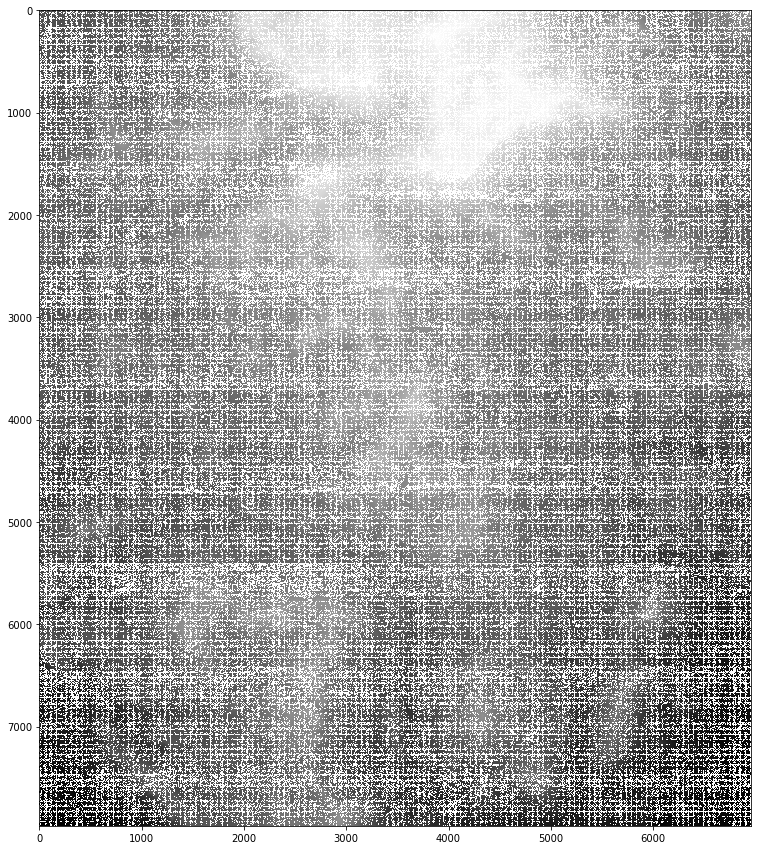

In [55]:
fig,ax = plt.subplots(figsize = (15,15))
masked_array = np.ma.array (data_array, mask=np.isnan(data_array))
cmap = matplotlib.cm.get_cmap("Greys").copy()
cmap.set_bad('white',1.)
ax.imshow(masked_array, interpolation='nearest', cmap='Greys_r');

## Conclusion

The 3D Elevation Program has, to date, collected a substantial amount of high-resolution elevation data across much of the United States and US Territories. This Jupyter Notebook is designed to make accessing, processing, visualizing, and creating derivative products with 3DEP more straightforward and to circumvent restrictions which may be in place regulating the maximum number of points one can access through programmatically accessing the AWS EPT bucket programmatically with Python. 

Specifically, this notebook provides a workflow for programmatically accessing, processing, and visualizing point cloud and derivative products for a user-defined USGS 7.5' Quadrangle.


Feedback regarding the workflow, specific use cases, and any computational testing with the notebook are welcomed and encouraged! 

## Resources

* [OpenTopography Portal](https://portal.opentopography.org/datasets)
* [Amazon Web Services Entwine Point Tile (EPT) Bucket](https://registry.opendata.aws/usgs-lidar/) 
* [USGS 3DEP Entwine Portal](https://usgs.entwine.io/)
* [USGS Community for Data Integration (CDI)](https://www.usgs.gov/centers/community-for-data-integration-cdi)
* [PDAL Documentation](https://pdal.io/)